# Classification Performance Assessment

Classification performance is different from regression performance.  Below we look at some of the calculations that 

In [39]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

import statsmodels.api as sm


In [40]:

def specificity_score(y_true, y_pred):
    """
    Calculate specificity.

    Args:
        y_true (list or numpy.ndarray): True labels.
        y_pred (list or numpy.ndarray): Predicted labels.

    Returns:
        float: Specificity score.
    """
    true_negatives = sum((y_true == 0) & (y_pred == 0))
    false_positives = sum((y_true == 0) & (y_pred == 1))
    
    if (true_negatives + false_positives) == 0:
      return 0.0
    
    specificity = true_negatives / (true_negatives + false_positives)
    return specificity

Let's apply these performance metrics to the Overdrawn data and models we fit last time.

In [41]:
# read in the monkey data
overdrawn = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2302/Overdrawn.csv")
# get info about these data
overdrawn.dropna(inplace=True)
overdrawn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 449
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        437 non-null    float64
 1   Sex        437 non-null    float64
 2   DaysDrink  437 non-null    float64
 3   Overdrawn  437 non-null    float64
dtypes: float64(4)
memory usage: 17.1 KB


The data is about students.  Here are the details on the variables in these data:

_Age_ =	Age of the student (in years)

_Sex_ =	0=male or 1=female

_DaysDrink_ = Number of days drinking alcohol (in past 30 days)

_Overdrawn_	= Has student overdrawn a checking account? 0=no or 1=yes

The first regression that we will do will use _DaysDrink_ as a predictor.

In [ ]:
# center _Age_
overdrawn['Age']=overdrawn['Age']-overdrawn['Age'].mean()

overdrawn_X = overdrawn[['DaysDrink','Age','Sex']]
overdrawn_X = sm.add_constant(overdrawn_X)

overdrawn_y = overdrawn['Overdrawn']
model2_sm = sm.Logit(overdrawn_y, overdrawn_X).fit()

# Print the summary table, which includes p-values
print(model2_sm.summary())

     const  DaysDrink       Age  Sex
0      1.0        3.0 -0.622426  1.0
1      1.0       20.0 -0.622426  0.0
2      1.0        6.0 -0.622426  0.0
3      1.0       10.0 -0.622426  1.0
4      1.0        0.0 -0.622426  1.0
..     ...        ...       ...  ...
445    1.0        1.0 -0.622426  1.0
446    1.0        0.0 -1.622426  0.0
447    1.0        8.0  0.377574  1.0
448    1.0        8.0 -0.622426  1.0
449    1.0        0.0  0.377574  0.0

[437 rows x 4 columns]
Optimization terminated successfully.
         Current function value: 0.350185
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Overdrawn   No. Observations:                  437
Model:                          Logit   Df Residuals:                      433
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                 0.08532
Time:                        16:06:

In [43]:
# create y_true which is 'ground truth' values for overdrawn
y_true=overdrawn_y
# create predicted values of 0/1 for from the model and call the y_pred
y_pred=(model2_sm.predict(overdrawn_X)>0.5).astype(int)


In [44]:
# make the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[380   1]
 [ 56   0]]


What does each of the values in the above confusion matrix represent?

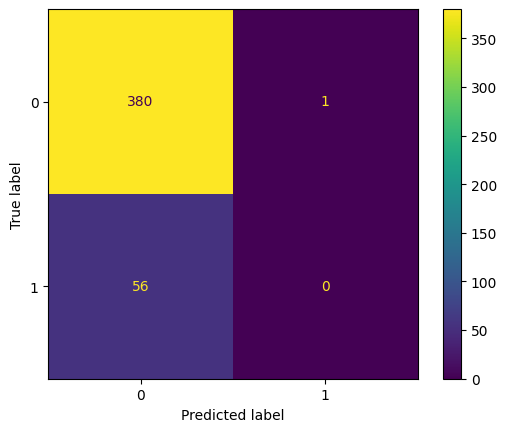

In [45]:
# here is a visual way to display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


### Tasks

From the above confusion matrix, 

1. calculate accuracy, 

2. calculate precision, 

3. calculate recall, 

4. calculate specificity.

 
Empty space here.  More code below











In [46]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8696


In [47]:
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.0000


In [48]:
specificity = specificity_score(y_true, y_pred)
print(f"Specificity: {specificity:.4f}")

Specificity: 0.9974


In [49]:
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.0000


Do your answers agree with the output from the Python functions?  If not, why not?